### You need to examine price_per_sqft column and do following,

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


#### Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

In [2]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [3]:
higher_limit = df.price_per_sqft.quantile(0.999)
higher_limit

50959.36200000098

In [4]:
lower_limit = df.price_per_sqft.quantile(0.001)
lower_limit

1366.184

In [ ]:
# without_outlier = df[(df.price_per_sqft<higher_limit) & (df.price_per_sqft>lower_limit)]
without_outlier.head()

#### 2. After removing outliers in step 1, you get a new dataframe.

#### 3. On step(2) dataframe, use 4 standard deviation to remove outliers

In [7]:
without_outlier.price_per_sqft.describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [8]:
STD = without_outlier.price_per_sqft.std() # calculating standard deviation
STD

4141.020700174605

In [9]:
MEAN = without_outlier.price_per_sqft.mean()  # calculating mean
MEAN

6663.6537351958705

In [10]:
higher_limit = MEAN + 4*STD
higher_limit

23227.73653589429

In [11]:
lower_limit = MEAN - 4*STD
lower_limit

-9900.429065502549

##### any data between higher_limit and lower_limit is valid, rest of them are outliers

In [12]:
new_df = without_outlier[(without_outlier.price_per_sqft<higher_limit) & (without_outlier.price_per_sqft>lower_limit)]
new_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


#### 4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

/Users/admin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


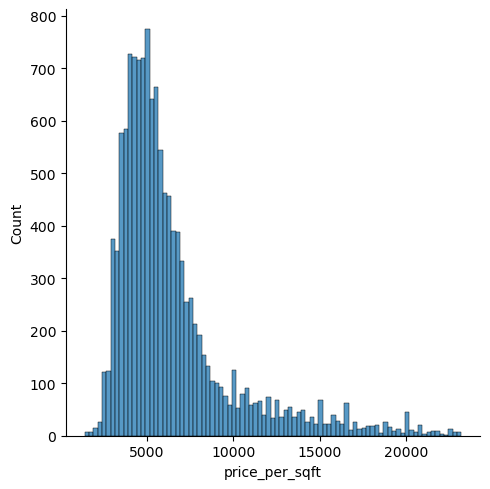

In [25]:
import seaborn as sn
sn.displot(new_df.price_per_sqft,kde_kws = {'bw':1000});

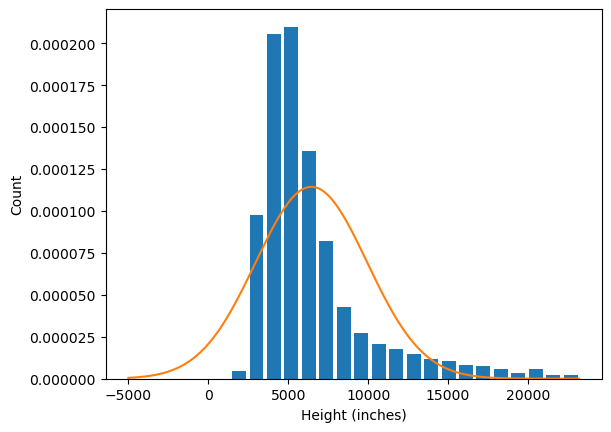

In [17]:
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt

plt.hist(new_df.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, new_df.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,new_df.price_per_sqft.mean(),new_df.price_per_sqft.std()))

#### Now remove outliers using z score. Use z score of 4 as your thresold

In [26]:
#step 2 dataframe = without_outlier
without_outlier['Zscore'] = (without_outlier.price_per_sqft - without_outlier.price_per_sqft.mean())/without_outlier.price_per_sqft.std()
without_outlier.head()

/var/folders/jz/0lm3kv9d405_z6yy2lqf77d40000gn/T/ipykernel_96772/4089797917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  without_outlier['Zscore'] = (without_outlier.price_per_sqft - without_outlier.price_per_sqft.mean())/without_outlier.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864


## to remove outlier
### datapoints who's zscore  >  4  and <-4
#### concept from Normal distribution

In [30]:
ans_df = without_outlier[(without_outlier.Zscore < 4 ) & (without_outlier.Zscore >- 4)] #with no outliers
ans_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
